# EN3150 - Assignment 01
# Learning from data and related challenges and linear models for regression

## Linear Regression Impact on outliers

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### 1. Finding the Linear Regression model.  

Here we will be using Residual Sum of Squares(RSS) to calculate the error. 
So our Loss function will be,  
$$ J(w) = \sum \limits_{i=1}^{n} (y_{i}-\hat{y}_{i})^{2} $$

Here $ \hat{y} = Ax+B $.
After taking the derivative w.r.t. $A$ and $B$ we get the following equations.

$$\frac{\partial J}{\partial A} = 2 \sum \limits_{i=1}^{n} (\hat{y} - y) x $$
$$\frac{\partial J}{\partial B} = 2 \sum \limits_{i=1}^{n} (\hat{y} - y) $$

We will use the above result to change the parameters of the model to minimize the Lost function



In [31]:
A = B = 0       # Initially setting up parameters 
lr = 0.001
epochs = 1500

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.0 , -40.0, -8.13, -11.73, -16.08, -19.95, -24.03])
loss = []
param_A = [A,]
param_B = [B,]

for i in range(epochs):
    y_hat = A*x + B
    loss_i = np.sum(np.square(y_hat - y))
    dA= 2*np.sum((y_hat-y)*x)
    dB= 2*np.sum(y_hat-y)
    A-= lr*dA
    B-= lr*dB
    loss.append(loss_i)
    param_A.append(A)
    param_B.append(B)

x_model = np.linspace(0,9,100)
y_model = A*x_model+ B

In [32]:
print(A,B)

-3.5571301153987736 3.9158330127293275


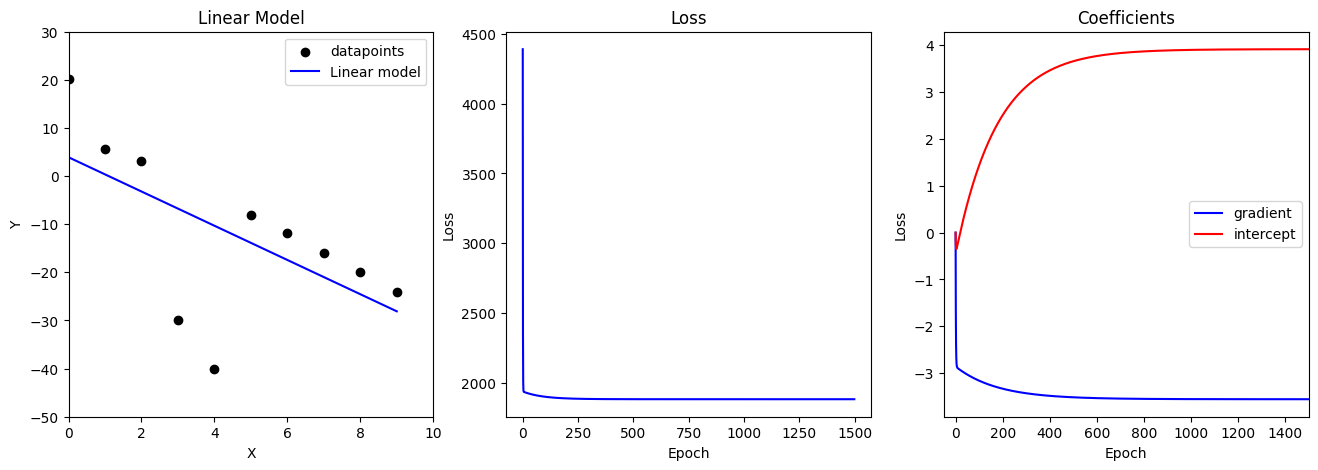

In [33]:
fig = plt.figure(figsize=(16,5))

plt.subplot(131)

plt.scatter(x,y, color='black', label='datapoints')
plt.plot(x_model,y_model, color='blue', label='Linear model' )
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim((-50,30))
plt.xlim((0,10))
plt.title("Linear Model")

plt.subplot(132)

plt.plot(loss, color='blue')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(133)

plt.plot(param_A, color='blue', label='gradient')
plt.plot(param_B, color='red' , label='intercept')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.xlim((-50,1500))
plt.ylabel('Loss')
plt.title('Coefficients')

plt.show()

- Now let's consider the new loss function to reduce the effect of outliers.
$$ L(\theta , \beta) = \frac{1}{N} \sum \limits_{i=1}^{N} \frac{(y_i - \hat{y}_i)^{2}}{(y_i - \hat{y}_i)^2 + \beta^2} $$

- Partial Derivatives of the loss function w.r.t. out model parameters $A$ and $B$ are as follows,
$$  \frac{\partial L}{\partial A} = \frac{2\beta^2}{N} \sum \limits_{i=1}^{N} \frac{(y_i - \hat{y}) x}{((y_i - \hat{y}_i)^2 + \beta^2)^2} $$
$$  \frac{\partial L}{\partial B} = \frac{2\beta^2}{N}  \sum \limits_{i=1}^{N} \frac{(y_i - \hat{y}) }{((y_i - \hat{y}_i)^2 + \beta^2)^2} $$

- We will use the above functions to calculate the gradient and tune our parameters.

In [34]:
def calc_loss(A,B,x,y,beta,N=10):
    y_hat = A*x + B

    error = y - y_hat
    denom = error**2 + beta**2

    loss = (1/N) * np.sum(error**2 / denom)

    return loss

In [35]:
N = 10

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([20.26, 5.61, 3.14, -30.0 , -40.0, -8.13, -11.73, -16.08, -19.95, -24.03])


# Loss for model 1
A1 = -4
B1 = 12 

L11 = calc_loss(A1,B1,x,y,1,N)           #Loss for beta=1
L12 = calc_loss(A1,B1,x,y,0.000001,N)    #Loss for beta=10^-6
L13 = calc_loss(A1,B1,x,y,1000,N)        #Loss for beta=1000

print('For beta = 1 Model 1 Loss: ', L11)
print('For beta = 10^-6 Model 1 Loss: ', L12)
print('For beta = 10^3 Model 1 Loss: ', L13)



# Loss for model 2
A2 = -3.55
B2 = 3.91 

L21 = calc_loss(A2,B2,x,y,1,N)           #Loss for beta=1
L22 = calc_loss(A2,B2,x,y,0.000001,N)    #Loss for beta=10^-6
L23 = calc_loss(A2,B2,x,y,1000,N)        #Loss for beta=1000

print('For beta = 1 Model 2 Loss: ', L21)
print('For beta = 10^-6 Model 2 Loss: ', L22)
print('For beta = 10^3 Model 2 Loss: ', L23)

For beta = 1 Model 1 Loss:  0.435416262490386
For beta = 10^-6 Model 1 Loss:  0.9999999998258207
For beta = 10^3 Model 1 Loss:  0.0002268287498440988
For beta = 1 Model 2 Loss:  0.9728470518681676
For beta = 10^-6 Model 2 Loss:  0.9999999999999718
For beta = 10^3 Model 2 Loss:  0.00018824684654645654


The most suitable value is $\beta=1$. When comparing the loss of *model 1* and *model 2* we can see significant difference when $\beta=1$. Loss is improved in *model 1* compared to *model 2* which has been affected by outliers.

In [36]:
A = -3.55
B = 3.91    # Initially setting up parameters 
lr = 0.005
epochs = 50000
beta=1

loss = []
param_A = [A,]
param_B = [B,]

for i in range(epochs):
    y_hat = A*x + B

    error = y - y_hat
    denom = error**2 + beta**2

    loss_i = (1/N) * np.sum(error**2 / denom)

    dA= (-1/N)*np.sum(2*(beta**2)*error*x/(denom**2))
    dB= (-1/N)*np.sum(2*(beta**2)*error/(denom**2))
    
    A-= lr*dA
    B-= lr*dB
    
    loss.append(loss_i)
    param_A.append(A)
    param_B.append(B)

x_model = np.linspace(0,9,100)
y_model = A*x_model+ B

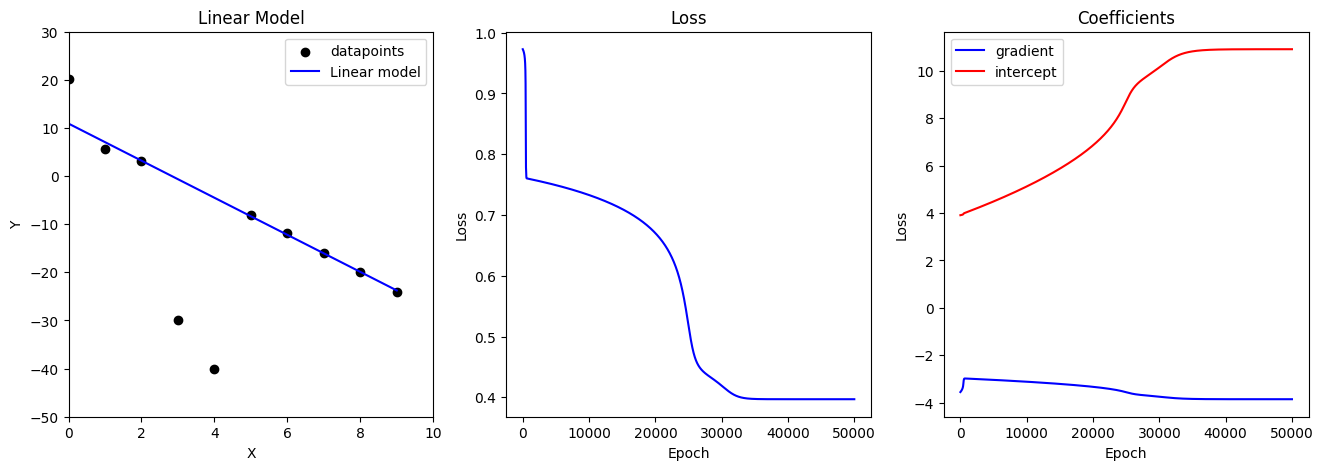

In [37]:
fig = plt.figure(figsize=(16,5))

plt.subplot(131)

plt.scatter(x,y, color='black', label='datapoints')
plt.plot(x_model,y_model, color='blue', label='Linear model' )
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.ylim((-50,30))
plt.xlim((0,10))
plt.title("Linear Model")

plt.subplot(132)

plt.plot(loss, color='blue')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(133)

plt.plot(param_A, color='blue', label='gradient')
plt.plot(param_B, color='red' , label='intercept')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Coefficients')

plt.show()

In [38]:
print(A,B)

-3.852452671133291 10.911656673254118


- **For very large values of $\beta$ ($\beta = 10^6$) :**  
>The loss values for both models are extremely close to 1 (e.g., 0.9999...). This happens because the denominator term, (yi​−y^​i​)2+β2, is dominated by the residual squared for almost every data point. The robust loss function essentially treats all points as large outliers and caps the loss for each point at a value of 1. As a result, the total loss becomes approximately 1, regardless of the model's performance. This value of β makes the loss function insensitive to changes in the model, making it useless for optimization.  

- **For very small values of $\beta$ ($\beta = 10^{-3}$) :**
>With a large $\beta$, the denominator term is dominated by $\beta^2$. The loss function for each data point simplifies to approximately $\frac{(yi​−y^​i​)^2}{\beta^2}​$, which is just a scaled version of the standard squared error. In this scenario, the robust nature of the loss function is lost. Outliers with large residuals will still have a large, dominant influence on the total loss, which is precisely what the robust estimator is designed to prevent.

- **For balanced value of $\beta$ ($\beta = 1$) :**
>This intermediate value allows the loss function to function as intended. For inliers (points with small residuals), the loss function behaves like a squared error, rewarding a good fit. For outliers (points with large residuals), the loss is capped at a value close to 1, preventing them from skewing the model.

## Loss Function

In [39]:
def calc_MSE(y, y_hat):
    N= len(y)

    MSE = (np.square(y - y_hat)) / N

    return MSE

def calc_BCE(y, y_hat):
    N = len(y)
    y_hat = np.clip(y_hat, 1e-15, 1 - 1e-15) #Avoid Zero Division Warnings

    BCE = (-1/N) * (y * np.log(y_hat) + (1-y) * np.log(1-y_hat))

    return BCE

In [40]:
y_true = np.ones((13,))
y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

MSE = calc_MSE(y_true, y_pred)
BCE = calc_BCE(y_true, y_pred)

+----------+----------+-------------+-------------+
|   y_true |   y_pred |         MSE |         BCE |
+==========+==========+=============+=============+
|        1 |    0.005 | 0.0761558   | 0.407563    |
+----------+----------+-------------+-------------+
|        1 |    0.01  | 0.0753923   | 0.354244    |
+----------+----------+-------------+-------------+
|        1 |    0.05  | 0.0694231   | 0.230441    |
+----------+----------+-------------+-------------+
|        1 |    0.1   | 0.0623077   | 0.177122    |
+----------+----------+-------------+-------------+
|        1 |    0.2   | 0.0492308   | 0.123803    |
+----------+----------+-------------+-------------+
|        1 |    0.3   | 0.0376923   | 0.0926133   |
+----------+----------+-------------+-------------+
|        1 |    0.4   | 0.0276923   | 0.0704839   |
+----------+----------+-------------+-------------+
|        1 |    0.5   | 0.0192308   | 0.053319    |
+----------+----------+-------------+-------------+
|        1 |

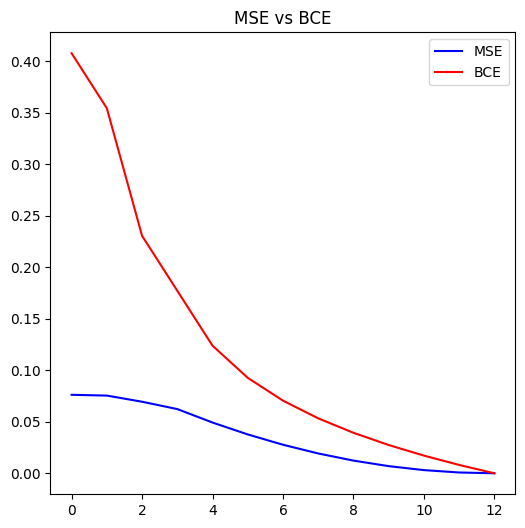

In [41]:
from tabulate import tabulate

# Create a DataFrame to display the values
data = {
    "y_true": list(y_true),
    "y_pred": list(y_pred),
    "MSE": list(MSE),
    "BCE": list(BCE)
}

# Convert to tabulate format
table = tabulate(data, headers="keys", tablefmt="grid")

# Print the table
print(table)

print("\n\nMSE :",np.sum(MSE))
print("BCE :",np.sum(BCE))

fig = plt.figure(figsize=(6,6))

plt.plot(MSE, label='MSE', color='blue')
plt.plot(BCE, label='BCE', color='red')
plt.legend(loc = 'best')
plt.title("MSE vs BCE")

plt.show()



- For the Application 01 where the output is a continous variable Linear regression is used. We need to estimate a line which moves closer to our datapoints. Therefore the Mean Squared error is suitable. In MSE when prediction deviates heavily, due to squaring the error Loss function return larger values leading to faster convergance.  

- In Binary classification model output is a probaility. BCE measures the difference of model output probability and actual binary label. With the logarithmic penalization of BCE, the incorrect predictions with high confidence are heavily penalized. Also BCE provides gradients that are well-suited for optimizing models that output probabilities, such as logistic regression. Therefore BCE is suitable as the loss function for the Application 02.

## Data Pre-Processing